In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


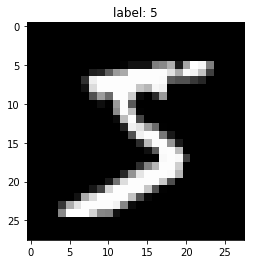

In [12]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print"image data 형태:", image.size()
print"label: ", label

# 그리기
img = image.numpy() # image 타입을 numpy 로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [14]:
# hyper parameters
batch_size = 1024
learning_rate = 0.01
num_epoch = 400

In [17]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

58
[0]
한 번에 로드되는 데이터 크기: 1024


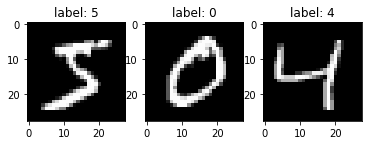

In [42]:
n = 3
for i, [imgs, labels] in enumerate(test_loader): # batch_size 만큼
    if i > 0:
        break
    
    print "[%d]" % i
    print "한 번에 로드되는 데이터 크기:",  len(imgs)
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2])) # (1,28,28) -> (28,28)
        
        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show()
        

In [49]:
# 모델 선언
## 퍼셉트론(2 hidden layer) ##
model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10),
)

# print(list(model.parameters()))

In [53]:
# 정확도 계산 함수
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = imgs # x
        label = Variable(labels) #y
        
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)
        
        output = imodel(img) # forward prop.
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [55]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 9.87506771088


In [56]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
num_epoch = 400
for i in range(num_epoch):
    for j, [imgs, labels] in enumerate(train_loader):
        img = imgs # (batch_size, 1, 28, 28)
        label = Variable(labels) #(batch_size)
        
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)
        
        optimizer.zero_grad()
        output = model(img) # forward prop.
        loss = loss_func(output, label)
        
        loss.backward() #back prop.
        optimizer.step() # wegith 조정
        
    if i%50 == 0:
        print("%d.." %i)
        ComputeAccr(test_loader, model)
        print loss
        
        # prameter save
        netname = './nets/mlp_weight.pkl'
        torch.save(model, netname, )

0..
Accuracy of Test Data: 91.5662078857
tensor(0.3248, grad_fn=<NllLossBackward>)


In [59]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 91.5375823975
